## Spatial interpolation for Purple Air AQI

Last updated on 07/06/2023


This notebook demonstrates the spatial interpolation of the Purple Air AQI


User-defined variables

In [6]:
# Data csv file
infile = 'drive/MyDrive/purpleair_chicago_20230626.csv'
# Grid and domainfile
gridfile = 'drive/MyDrive/grid.pkl'

## Google Colab Environment

In [2]:
pip install ipyleaflet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00


In [3]:
pip install gpcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.2/285.2 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 47.7 MB/s eta 0:00:00
  Created wheel for zmq: filename=zmq-0.0.0-py3-none-any.whl size=1264 sha256=2183e0f2cab0b3df5c9fabf7bd51c993abb17e113048398119887bc5c15cb088
  Stored in

In [4]:
pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=f2e846b834eb3a8d679ae8a109fac7c736c573738897253b8bd1c58d4536d995
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Data

In [7]:
import pandas as pd
import pickle

In [8]:
df = pd.read_csv(infile)

In [9]:
f = open(gridfile,"rb")
grid = pickle.load(f)
f.close()

## Map Visualization

In [10]:
from ipyleaflet import Map
from ipyleaflet import basemaps
from ipyleaflet import (Map, basemaps, WidgetControl, GeoJSON,
                        LayersControl, Icon, Marker,FullScreenControl,
                        CircleMarker, Popup, AwesomeIcon)
from ipywidgets import HTML
import matplotlib.pyplot as plt
import matplotlib as mpl

In [23]:
def plotmapAQI(metric,df,center,zoom):
    df = df.reindex(columns = df.columns.tolist()+ ['color'])
    # Determine color depending on the values
    color=[]
    # Scaling the values
    for (i,j) in df.iterrows():
        value=j[metric]
        if value<=50:
            color.append('green')
        elif(value>50 and value<=100):
            color.append('yellow')
        elif(value>100 and value<=150):
            color.append('orange')
        elif(value>150 and value<=200):
            color.append('red')
        else:
            color.append('darkred')
    df['color']=color
    # Map
    center = center
    zoom = zoom
    i=0
    m = Map(basemap=basemaps.Esri.WorldImagery, center=center, zoom=zoom)
    # Add markers
    for (index,row) in df.iterrows():
        loc = [row.loc['Latitude'],row.loc['Longitude']]
        #icon = AwesomeIcon(
        #         marker_color='red')
        # marker = Marker(location=loc, icon, draggable=False,alt='alt')
        # marker.color = 'red'
        marker = CircleMarker()
        marker.location = loc
        marker.radius = 5
        marker.color = row.loc['color']
        marker.fill_color = row.loc['color']

        m.add_layer(marker);
        # Pop up
        message = HTML()
        message.value = 'Location:'+str(row.loc['Latitude'])+','+str(row.loc['Longitude'])+', Value:'+str(row.loc[metric])
        marker.popup = message

        i+=1
    m.add_control(FullScreenControl())
    mpl.rcParams.update({'font.size': 10})
    fig=plt.figure(figsize=(8,3))
    ax=fig.add_subplot(111)
    vals=[]
    for i in range(6):
        vals.append((((250)/5)*i)+0)
    cmap = mpl.colors.ListedColormap(['green','yellow','orange','red','darkred'])
    norm = mpl.colors.BoundaryNorm(vals, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                spacing='uniform',
                                orientation='horizontal',
                                extend='neither',
                                ticks=vals)
    cb.set_label(metric)
    ax.set_position((0.1, 0.45, 0.8, 0.1))
    return m

Map(center=[42.8172225, -87.39416800000001], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

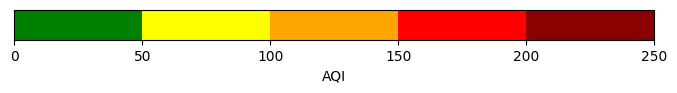

In [24]:
metric = "AQI"
plotmapAQI(metric,df,grid['center'],7)

## Interpolation by GPCAM

In [26]:
import gpcam
from gpcam.autonomous_experimenter import AutonomousExperimenterGP
from gpcam.gp_optimizer import GPOptimizer

import numpy as np

In [53]:
# Define the kernel/covariance
def kernel_RBF_noise(x1, x2, hps, obj):
    var = hps[0]
    noise_var = hps[3]
    d1 = abs(np.subtract.outer(x1[:, 0], x2[:, 0]))
    d2 = abs(np.subtract.outer(x1[:, 1], x2[:, 1]))
    d = ((d1/hps[1])**2 + (d2/hps[2])**2)**0.5
    K = var * np.exp(-d ** 2)
    if x1 is x2:
        return K + noise_var * np.eye(K.shape[0])
    else:
        return K

In [54]:
x = np.column_stack((np.array(df['Latitude']),np.array(df['Longitude'])))

In [56]:
x_train = x
y_train = np.array(df['AQI'])

param_bounds = np.array([[x_train[:,0].min(), x_train[:,0].max()],
                [x_train[:,1].min(), x_train[:,1].max()]])
init_hp = np.array([np.var(y_train),2.0,2.0, np.var(y_train)*0.01])
hp_bounds = np.array([[np.var(y_train)*0.9,np.var(y_train)*1.1],[0.5,3.0],[0.5,3.0],[np.var(y_train)*0.009,np.var(y_train)*0.015]])

In [57]:
my_ae = AutonomousExperimenterGP(param_bounds,
                                 init_hp,
                                 hp_bounds,
                                 init_dataset_size= 100,
                                 x_data=x_train,
                                 y_data=y_train,
                                 kernel_func = kernel_RBF_noise,
                                 use_inv = True,
                                 communicate_full_dataset = False,
                                 ram_economy = True)#, info = False, prior_mean_func = optional_mean_func)
my_ae.train(max_iter=10000)

In [58]:
#y_pred = my_ae.gp_optimizer.posterior_mean(xx)['f(x)']
#r2 = r2_score(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#r2_scores.append(r2)
#pearson_squares.append((pearsonr(z_test, z_pred).statistic)**2)
#mses.append(mse)
xx = np.column_stack((grid['xx0'].flatten(),grid['xx1'].flatten()))
f = my_ae.gp_optimizer.posterior_mean(xx)["f(x)"].reshape(grid['n_pts'])
v = my_ae.gp_optimizer.posterior_covariance(xx)["v(x)"].reshape(grid['n_pts'])
np.save(infile+'.npy',f)

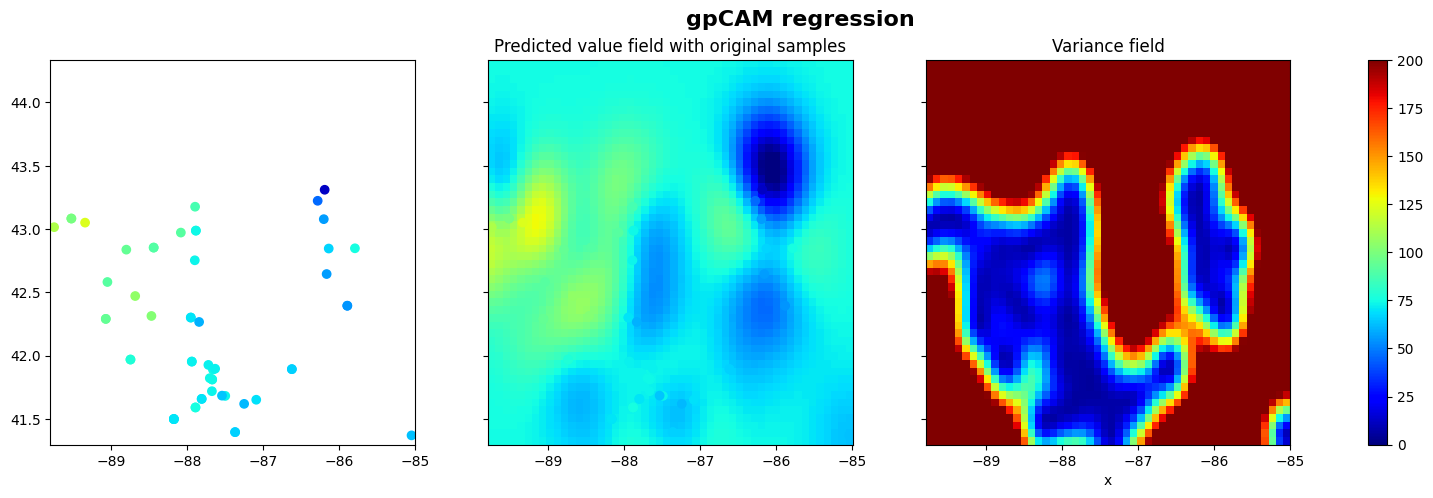

In [60]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=True, sharey=True)

# Original values
axs[0].scatter(x[:,1], x[:,0], c=y_train, cmap="jet",vmin=0,vmax=200)

# Predicted value field
s1 = axs[1].pcolormesh(grid['xx1'], grid['xx0'], f, cmap="jet",vmin=0,vmax=200)
axs[1].scatter(x[:, 1], x[:, 0], c=y_train, cmap="jet",vmin=0,vmax=200)
axs[1].set_title(f'Predicted value field with original samples')

# Variance field
s2 = axs[2].pcolormesh(grid['xx1'], grid['xx0'], v, cmap="jet",vmin=0,vmax=200)
axs[2].set_title(f'Variance field')
axs[2].set_xlabel('x')

# Create a single colorbar for all subplots
fig.colorbar(s1, ax=axs)  # Adjust the 'pad' parameter to change the spacing between plots and colorbar

# Set title for the entire figure
fig.suptitle(f'gpCAM regression', fontsize=16, fontweight='bold')
plt.show()

## Overlay with Map

In [61]:
from base64 import b64encode
from io import StringIO, BytesIO
import PIL
from ipyleaflet import Map, ImageOverlay

In [62]:
f = (f-np.min(f))/(np.max(f)-np.min(f))
f = np.transpose(f)
f = np.flipud(f)
f_im = PIL.Image.fromarray(np.uint8(plt.cm.jet(f) * 255))
im = PIL.Image.new("RGBA", f.shape, color=None)
im.paste(f_im)

In [63]:
fio = BytesIO()
im.save(fio, "png")
data = b64encode(fio.getvalue())
data = data.decode("ascii")
imgurl = "data:image/png;base64," + data

In [64]:
m = Map(center=grid['center'], zoom=7)
image = ImageOverlay(
    url=imgurl,
    bounds=((grid['sw'][0],grid['sw'][1]), (grid['ne'][0],grid['ne'][1])),
    opacity=0.3
)

m.add_layer(image);
m

Map(center=[42.8172225, -87.39416800000001], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…